In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [3]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation, Dropout, Lambda, Flatten, MaxPool2D
from keras.initializers import Constant

dropout = 0.2
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Lambda(lambda x: K.dropout(x, level=dropout)))
model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(MaxPool2D())
model.add(Lambda(lambda x: K.dropout(x, level=dropout)))
model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Lambda(lambda x: K.dropout(x, level=dropout)))
model.add(Dense(128, activation='relu'))
model.add(Lambda(lambda x: K.dropout(x, level=dropout)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s - loss: 11.0739 - acc: 0.2500 - val_loss: 6.0006 - val_acc: 0.4323
Epoch 2/30
60000/60000 [==============================] - 1s - loss: 2.3039 - acc: 0.5104 - val_loss: 0.9523 - val_acc: 0.6761
Epoch 3/30
60000/60000 [==============================] - 1s - loss: 0.7537 - acc: 0.7535 - val_loss: 0.5805 - val_acc: 0.8171
Epoch 4/30
60000/60000 [==============================] - 1s - loss: 0.5132 - acc: 0.8365 - val_loss: 0.4241 - val_acc: 0.8615
Epoch 5/30
60000/60000 [==============================] - 1s - loss: 0.4112 - acc: 0.8721 - val_loss: 0.3639 - val_acc: 0.8892
Epoch 6/30
60000/60000 [==============================] - 1s - loss: 0.3449 - acc: 0.8902 - val_loss: 0.2993 - val_acc: 0.9073
Epoch 7/30
60000/60000 [==============================] - 1s - loss: 0.2970 - acc: 0.9070 - val_loss: 0.2639 - val_acc: 0.9183
Epoch 8/30
60000/60000 [==============================] - 1s

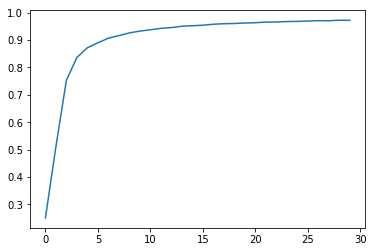

In [4]:
h = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=2048)
plt.plot(h.history['acc']);

In [9]:
def predict(x, samples=10000):
    t = x.reshape((1,28,28,1))
    t = t.repeat(samples, 0)
    ty = model.predict(t, batch_size=2048)
    y_ = np.mean(ty, 0)
    std = np.std(ty, 0)
    
    return y_, std


def plot_pred(i, samples=10000):
    y_, std = predict(x_test[i], samples)
    y = np.argmax(y_)
    # show img
    print(f'Prediction: {y}')
    print(f'Real      : {y_test[i]}')
    fig, ax = plt.subplots(ncols=2, figsize=(14,6))
    ax[0].imshow(x_test[i].reshape(28,28), cmap='gray')
    ax[0].axis('off')
    std_lines = [(y - 1.96*std[i], y + 1.96*std[i]) for i,y in enumerate(y_)]
    # plt.figure(figsize=(14,6))
    for i, (y1,y2) in enumerate(std_lines):
        ax[1].vlines(i, y1, y2, 'red', 'dashed', linewidth=2)
    ax[1].scatter(range(10), y_, s=100, c='b')
    ax[1].set_xticks(range(10))
    plt.show()


Prediction: 2
Real      : 2


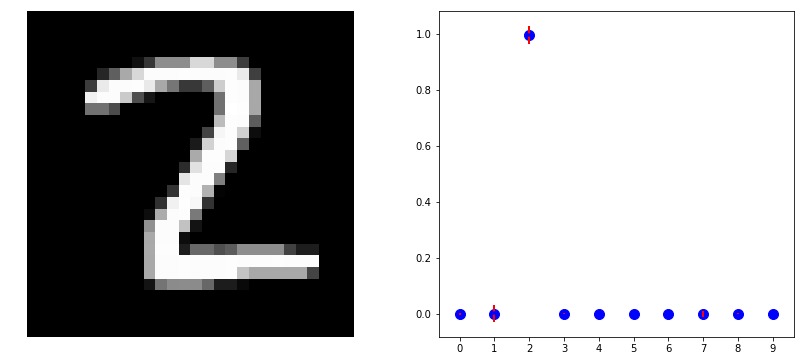

Prediction: 5
Real      : 5


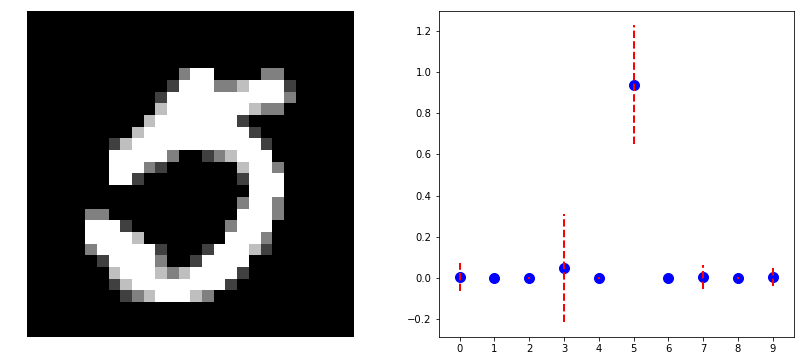

Prediction: 7
Real      : 7


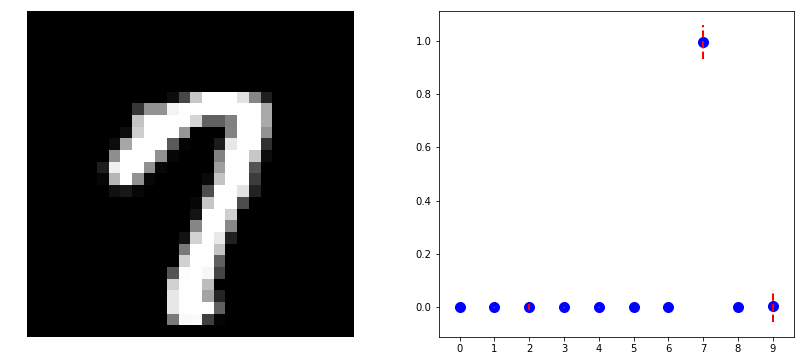

Prediction: 8
Real      : 8


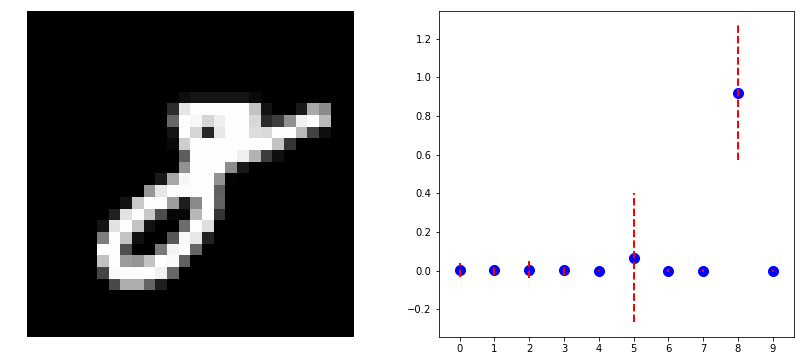

Prediction: 9
Real      : 9


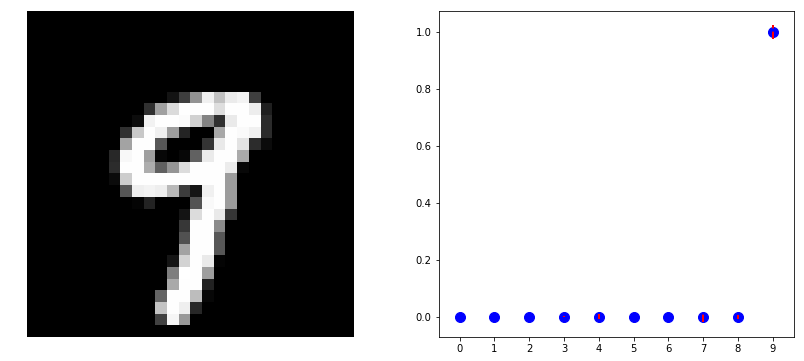

Prediction: 9
Real      : 9


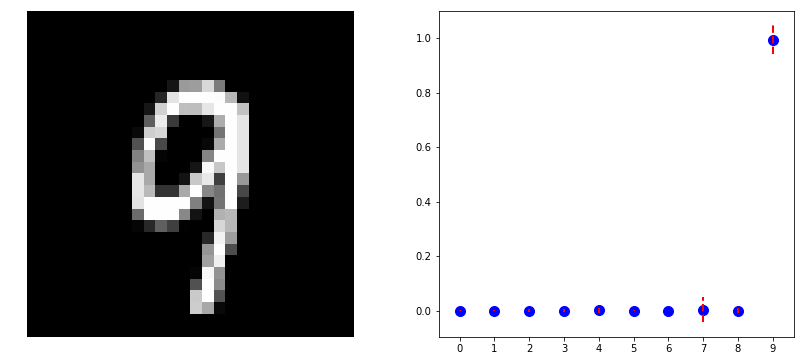

Prediction: 8
Real      : 8


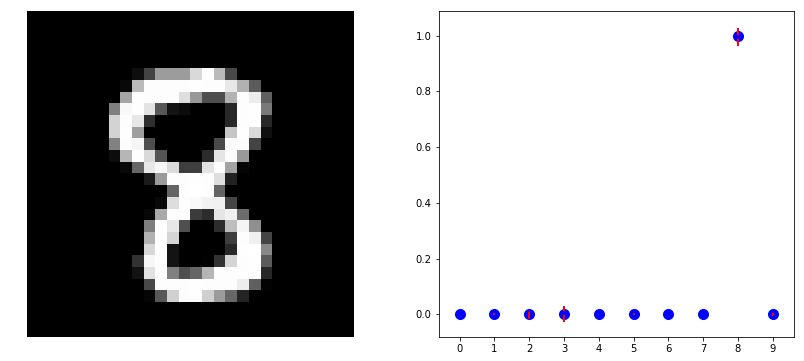

Prediction: 3
Real      : 3


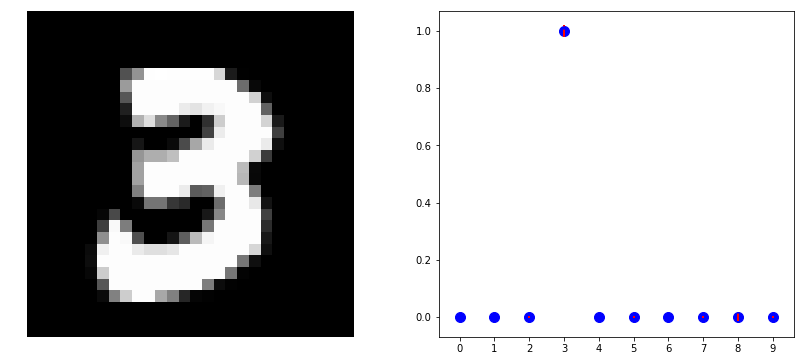

Prediction: 4
Real      : 4


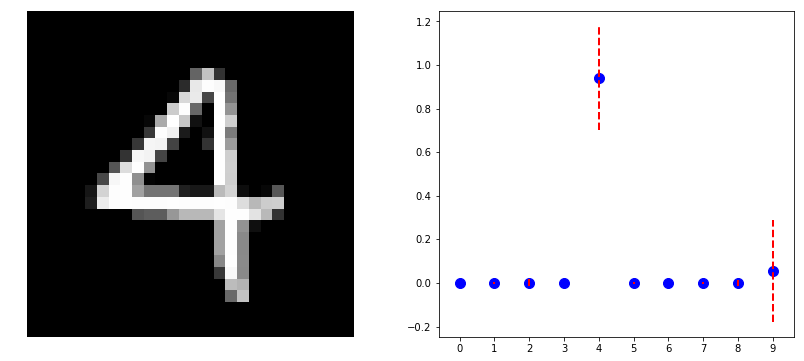

Prediction: 5
Real      : 5


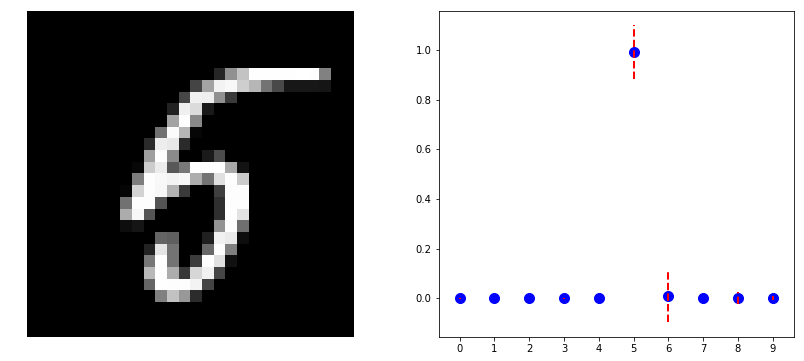

In [15]:
for _ in range(10):
    random_i = np.random.choice(len(x_test))
    plot_pred(random_i)